## Titer of all IDT-FL, IDT_HATail, IDT_ALAYT with backbones 25 (ZsG), 1247 (pHAGE6 Luc_ZsG), and 1270 (pHAGE Luc_ZsG) infecting 293Ts transduced with ACE2.

In [1]:
import os
import warnings

import pandas as pd
import numpy as np

from plotnine import *

from IPython.display import Image

In [2]:
warnings.simplefilter('ignore')

In [3]:
CBPALETTE = ('#999999', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7')

In [4]:
theme_set(theme_seaborn(style='white', context='paper', font_scale=1))

### Read in flow data

In [5]:
flow_data = pd.read_csv('../../../../../lab_notebooks/kdusenbu/VEP_DMS/flow_data/200411/DifBBs_DifTails_table_200413_titerscalc_cleanedcols.csv')

In [6]:
flow_data['Virus(mL)'] = flow_data['Virus(mL)'].replace(0.00023999999999999998, 0.00024)
flow_data['Virus(mL)'] = flow_data['Virus(mL)'].astype('category')
flow_data

,Unnamed: 0,TubeName,Spike,BB,Cells,Virus(mL),%ZsG+,%ZsG+_conservative,Titer,Titer_Cons
0,Specimen_001_A5_A05_001.fcs,A5,None,pHAGE6,22800.0,0.03000,0.000,0.000,0.0,0.0
1,Specimen_001_A6_A06_002.fcs,A6,None,pHAGE,22800.0,0.03000,0.000,0.000,0.0,0.0
2,Specimen_001_I_1270_B4_003.fcs,I_1270_B4,Full_Length,pHAGE,22800.0,0.03000,0.098,0.072,746.0,548.0
3,Specimen_001_NV_25_001.fcs,NV_25,None,ZsGreen,22800.0,0.03000,0.000,0.000,0.0,0.0
4,Specimen_001_V_25_B1_002.fcs,V_25_B1,VSV-G,ZsGreen,22800.0,0.00120,16.700,13.900,3180000.0,2640000.0
5,Specimen_002_C1_C01_003.fcs,C1,VSV-G,ZsGreen,22800.0,0.00024,4.440,3.570,4220000.0,3400000.0
6,Specimen_004_B2_B02_005.fcs,B2,Full_Length,ZsGreen,22800.0,0.03000,7.110,1.770,54100.0,13500.0
7,Specimen_004_B3_B03_006.fcs,B3,Full_Length,pHAGE6,22800.0,0.03000,1.250,1.080,9510.0,8220.0
8,Specimen_004_C2_C02_007.fcs,C2,Full_Length,ZsGreen,22800.0,0.00600,0.310,0.250,11800.0,9510.0
9,Specimen_005_B5_B05_008.fcs,B5,HA_Tail,ZsGreen,22800.0,0.03000,5.990,0.480,45600.0,3650.0


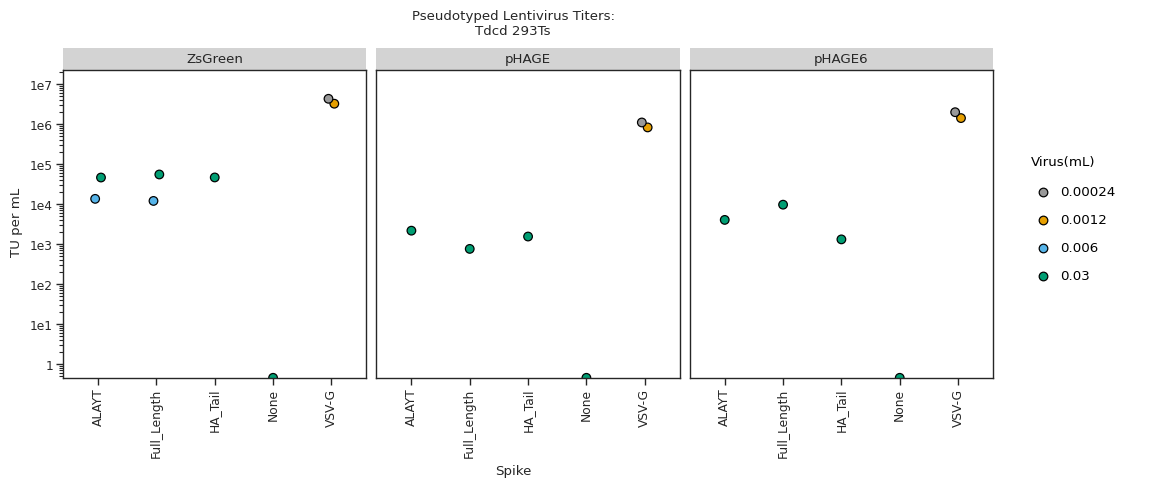

In [7]:
titers_by_bb = (ggplot(flow_data, aes(x='Spike', y='Titer', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 4)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ BB', ncol=3) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts')
                             )

_ = titers_by_bb.draw()


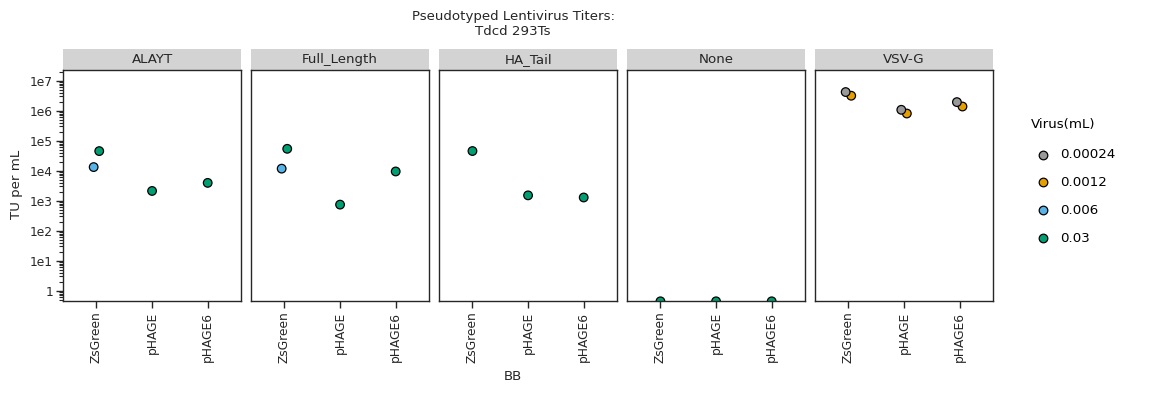

In [8]:
titers_by_spike = (ggplot(flow_data, aes(x='BB', y='Titer', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 3)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ Spike', ncol=5) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts')
                             )

_ = titers_by_spike.draw()

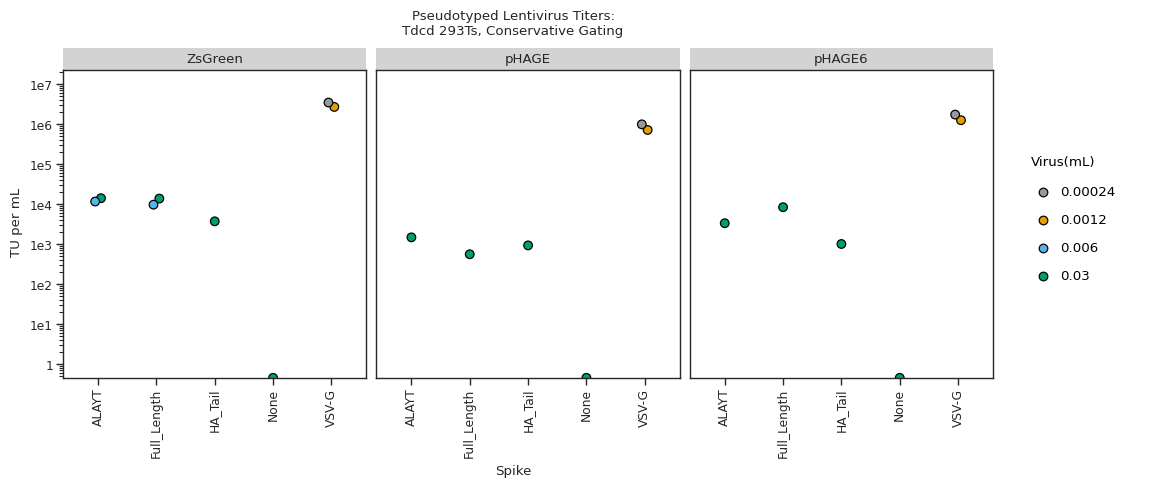

In [9]:
conservative_titers_by_bb = (ggplot(flow_data, aes(x='Spike', y='Titer_Cons', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 4)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ BB', ncol=3) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts, Conservative Gating')
                             )

_ = conservative_titers_by_bb.draw()

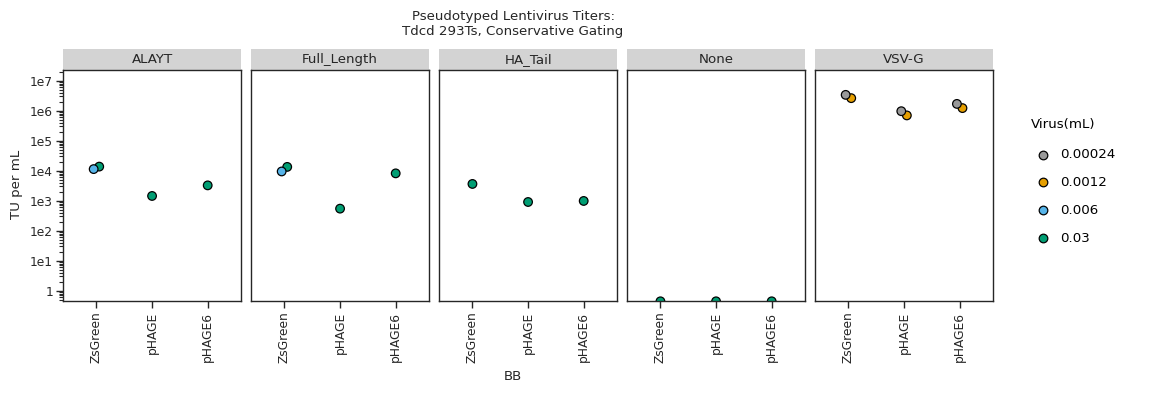

In [10]:
conservative_titers_by_spike = (ggplot(flow_data, aes(x='BB', y='Titer_Cons', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 3)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ Spike', ncol=5) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts, Conservative Gating')
                             )

_ = conservative_titers_by_spike.draw()

In [11]:
titers_for_fig = flow_data[(flow_data['Virus(mL)'] == 0.03) |
                           (flow_data['Virus(mL)'] == 0.00024)]

titers_for_fig.replace('Full_Length', 'SARS-CoV-2 Spike, Full Length', inplace=True)
titers_for_fig.replace('HA_Tail', 'SARS-CoV-2 Spike, HA Tail', inplace=True)
titers_for_fig.replace('ALAYT', 'SARS-CoV-2 Spike, ALAYT', inplace=True)
titers_for_fig.replace('VSV-G', 'VSV G', inplace=True)
titers_for_fig.replace('ZsGreen', 'ZsGreen backbone', inplace=True)
titers_for_fig.replace('pHAGE', 'Luciferase-IRES-ZsGreen backbone 1', inplace=True)
titers_for_fig.replace('pHAGE6', 'Luciferase-IRES-ZsGreen backbone 2', inplace=True)

spike_list = ['SARS-CoV-2 Spike, Full Length', 'SARS-CoV-2 Spike, ALAYT', 'SARS-CoV-2 Spike, HA Tail', 'VSV G', 'None']
spike_cat = pd.Categorical(titers_for_fig['Spike'], categories=spike_list)

bb_list = ['ZsGreen backbone'] #, 'Luciferase-IRES-ZsGreen backbone 1', 'Luciferase-IRES-ZsGreen backbone 2']
bb_cat = pd.Categorical(titers_for_fig['BB'], categories=bb_list)

titers_for_fig = titers_for_fig.assign(spike_cat = spike_cat)
titers_for_fig = titers_for_fig.assign(Backbone = bb_cat)

display(titers_for_fig)

,Unnamed: 0,TubeName,Spike,BB,Cells,Virus(mL),%ZsG+,%ZsG+_conservative,Titer,Titer_Cons,spike_cat,Backbone
0,Specimen_001_A5_A05_001.fcs,A5,None,Luciferase-IRES-ZsGreen backbone 2,22800.0,0.03000,0.000,0.000,0.0,0.0,None,NaN
1,Specimen_001_A6_A06_002.fcs,A6,None,Luciferase-IRES-ZsGreen backbone 1,22800.0,0.03000,0.000,0.000,0.0,0.0,None,NaN
2,Specimen_001_I_1270_B4_003.fcs,I_1270_B4,"SARS-CoV-2 Spike, Full Length",Luciferase-IRES-ZsGreen backbone 1,22800.0,0.03000,0.098,0.072,746.0,548.0,"SARS-CoV-2 Spike, Full Length",NaN
3,Specimen_001_NV_25_001.fcs,NV_25,None,ZsGreen backbone,22800.0,0.03000,0.000,0.000,0.0,0.0,None,ZsGreen backbone
5,Specimen_002_C1_C01_003.fcs,C1,VSV G,ZsGreen backbone,22800.0,0.00024,4.440,3.570,4220000.0,3400000.0,VSV G,ZsGreen backbone
6,Specimen_004_B2_B02_005.fcs,B2,"SARS-CoV-2 Spike, Full Length",ZsGreen backbone,22800.0,0.03000,7.110,1.770,54100.0,13500.0,"SARS-CoV-2 Spike, Full Length",ZsGreen backbone
7,Specimen_004_B3_B03_006.fcs,B3,"SARS-CoV-2 Spike, Full Length",Luciferase-IRES-ZsGreen backbone 2,22800.0,0.03000,1.250,1.080,9510.0,8220.0,"SARS-CoV-2 Spike, Full Length",NaN
9,Specimen_005_B5_B05_008.fcs,B5,"SARS-CoV-2 Spike, HA Tail",ZsGreen backbone,22800.0,0.03000,5.990,0.480,45600.0,3650.0,"SARS-CoV-2 Spike, HA Tail",ZsGreen backbone
10,Specimen_005_B6_B06_009.fcs,B6,"SARS-CoV-2 Spike, HA Tail",Luciferase-IRES-ZsGreen backbone 2,22800.0,0.03000,0.170,0.130,1290.0,989.0,"SARS-CoV-2 Spike, HA Tail",NaN
11,Specimen_005_B7_B07_010.fcs,B7,"SARS-CoV-2 Spike, HA Tail",Luciferase-IRES-ZsGreen backbone 1,22800.0,0.03000,0.200,0.120,1520.0,913.0,"SARS-CoV-2 Spike, HA Tail",NaN


In [12]:
titers_for_flow_fig = titers_for_fig[titers_for_fig['Backbone'] == 'ZsGreen backbone']

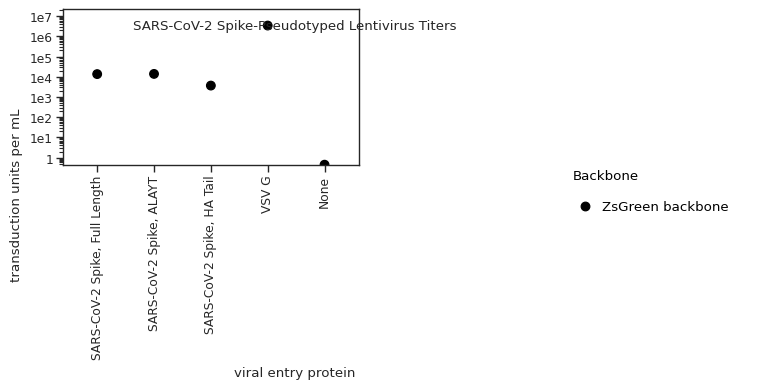

In [13]:
figure_spike_titers = (ggplot(titers_for_flow_fig, aes(x='spike_cat', y='Titer_Cons', shape='Backbone')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              # scale_fill_manual(values=CBPALETTE, name='Backbone') +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(6, 4)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              #geom_hline(yintercept=10) +
                              ylab('transduction units per mL') +
                              xlab('viral entry protein') +
                              ggtitle('SARS-CoV-2 Spike-Pseudotyped Lentivirus Titers')
                             )

_ = figure_spike_titers.draw()
_.tight_layout()
_.savefig('./figures/200413_TUpermL_ZsG.pdf')

In [14]:
RLUs_per_mL_all = {'FL_1247': [1.19E+07, 1.11E+07, 1.09E+07, 9.71E+06],
               'FL_1270': [1.81E+06, 1.40E+06, 1.69E+06, 2.21E+06],
               'HA_1247': [2.85E+07, 3.27E+06, 2.72E+06, 1.67E+06],
               'HA_1270': [1.89E+07, 3.09E+06, 2.18E+06, 1.36E+06],
               'ALAYT_1247': [3.78E+07, 7.57E+06, 7.25E+06, 9.64E+06],
               'ALAYT_1270': [3.06E+06, 2.64E+06, 3.32E+06, 5.19E+06],
               'VSVG_1247': [2.47E+08, 2.70E+08],
               'VSVG_1270': [1.43E+08, 1.55E+08]}

In [15]:
RLUs_per_mL = {'FL_1247': [np.nan, 1.11E+07, 1.09E+07, 9.71E+06],
               'FL_1270': [np.nan, 1.40E+06, 1.69E+06, 2.21E+06],
               'HA_1247': [np.nan, 3.27E+06, 2.72E+06, 1.67E+06],
               'HA_1270': [np.nan, 3.09E+06, 2.18E+06, 1.36E+06],
               'ALAYT_1247': [np.nan, 7.57E+06, 7.25E+06, 9.64E+06],
               'ALAYT_1270': [np.nan, 2.64E+06, 3.32E+06, 5.19E+06],
               'VSVG_1247': [np.nan, np.nan, 2.47E+08, 2.70E+08],
               'VSVG_1270': [np.nan, np.nan, 1.43E+08, 1.55E+08]}

In [16]:
RLUs_df = pd.DataFrame.from_dict(RLUs_per_mL, orient='index')
display(RLUs_df)

,0,1,2,3
FL_1247,NaN,11100000.0,10900000.0,9710000.0
FL_1270,NaN,1400000.0,1690000.0,2210000.0
HA_1247,NaN,3270000.0,2720000.0,1670000.0
HA_1270,NaN,3090000.0,2180000.0,1360000.0
ALAYT_1247,NaN,7570000.0,7250000.0,9640000.0
ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0
VSVG_1247,NaN,NaN,247000000.0,270000000.0
VSVG_1270,NaN,NaN,143000000.0,155000000.0


In [17]:
RLUs_df['Average'] = np.nan
RLUs_df['upper'] = np.nan
RLUs_df['lower'] = np.nan
for sample in RLUs_per_mL.keys():
    RLUs_df['Average'].loc[sample] = np.nanmean(RLUs_df.loc[sample])
    print(np.std(RLUs_df.loc[sample]))
    RLUs_df['upper'].loc[sample] = RLUs_df['Average'].loc[sample] + np.std(RLUs_df.loc[sample])
    RLUs_df['lower'].loc[sample] = RLUs_df['Average'].loc[sample] - np.std(RLUs_df.loc[sample])
RLUs_df.reset_index(inplace=True)

531366.1637703327
290201.07971313037
574818.8120326846
611923.1977952789
917396.6790144091
933711.2330194314
9389710.68066885
4898979.485566356


In [18]:
display(RLUs_df)

,index,0,1,2,3,Average,upper,lower
0,FL_1247,NaN,11100000.0,10900000.0,9710000.0,1.057000e+07,1.110137e+07,1.004937e+07
1,FL_1270,NaN,1400000.0,1690000.0,2210000.0,1.766667e+06,2.056868e+06,1.482329e+06
2,HA_1247,NaN,3270000.0,2720000.0,1670000.0,2.553333e+06,3.128152e+06,1.990128e+06
3,HA_1270,NaN,3090000.0,2180000.0,1360000.0,2.210000e+06,2.821923e+06,1.610440e+06
4,ALAYT_1247,NaN,7570000.0,7250000.0,9640000.0,8.153333e+06,9.070730e+06,7.254472e+06
5,ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0,3.716667e+06,4.650378e+06,2.801820e+06
6,VSVG_1247,NaN,NaN,247000000.0,270000000.0,2.585000e+08,2.678897e+08,2.494085e+08
7,VSVG_1270,NaN,NaN,143000000.0,155000000.0,1.490000e+08,1.538990e+08,1.442566e+08


In [19]:
RLUs_df['Spike'] = ['SARS-CoV-2 Spike, Full Length', 'SARS-CoV-2 Spike, Full Length', 'SARS-CoV-2 Spike, HA Tail', 'SARS-CoV-2 Spike, HA Tail', 
                    'SARS-CoV-2 Spike, ALAYT', 'SARS-CoV-2 Spike, ALAYT', 'VSV G', 'VSV G']
RLUs_df['BB'] = ['Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone', 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone',
                 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone', 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone']

spike_list_no_none = ['SARS-CoV-2 Spike, Full Length', 'SARS-CoV-2 Spike, ALAYT', 'SARS-CoV-2 Spike, HA Tail', 'VSV G']
spike_cat_rlus = pd.Categorical(RLUs_df['Spike'], categories=spike_list_no_none)

RLUs_df = RLUs_df.assign(spike_cat = spike_cat_rlus)

RLUs_for_Fig = RLUs_df[RLUs_df['BB'] == 'Luciferase-IRES-ZsGreen backbone']
display(RLUs_for_Fig)

,index,0,1,2,3,Average,upper,lower,Spike,BB,spike_cat
1,FL_1270,NaN,1400000.0,1690000.0,2210000.0,1.766667e+06,2.056868e+06,1.482329e+06,"SARS-CoV-2 Spike, Full Length",Luciferase-IRES-ZsGreen backbone,"SARS-CoV-2 Spike, Full Length"
3,HA_1270,NaN,3090000.0,2180000.0,1360000.0,2.210000e+06,2.821923e+06,1.610440e+06,"SARS-CoV-2 Spike, HA Tail",Luciferase-IRES-ZsGreen backbone,"SARS-CoV-2 Spike, HA Tail"
5,ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0,3.716667e+06,4.650378e+06,2.801820e+06,"SARS-CoV-2 Spike, ALAYT",Luciferase-IRES-ZsGreen backbone,"SARS-CoV-2 Spike, ALAYT"
7,VSVG_1270,NaN,NaN,143000000.0,155000000.0,1.490000e+08,1.538990e+08,1.442566e+08,VSV G,Luciferase-IRES-ZsGreen backbone,VSV G


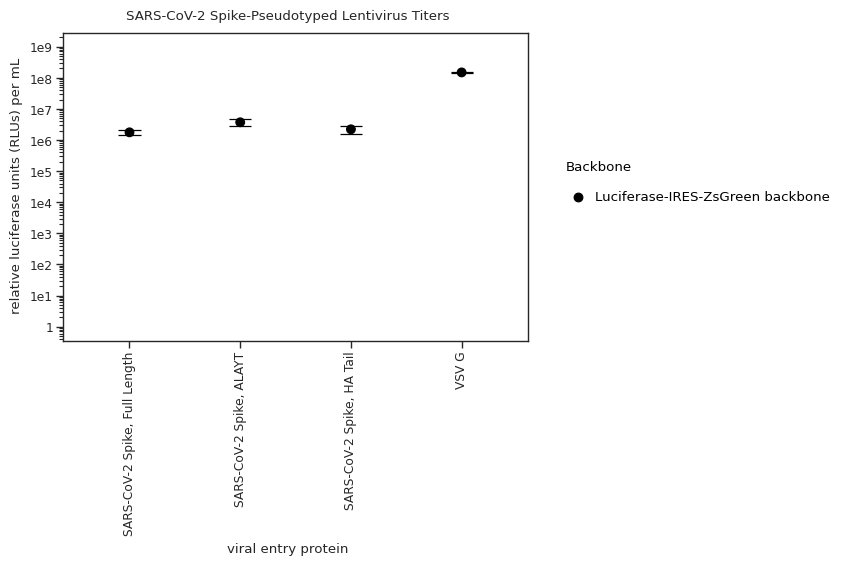

In [20]:
RLU_titers_plot = (ggplot(RLUs_for_Fig, aes(x='spike_cat', y='Average', shape='BB'))+
                         geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                         geom_errorbar(aes(ymin='lower', ymax='upper'), width=0.2,
                                           position=position_dodge(width=0.2)) +
                          scale_fill_manual(values=CBPALETTE[1:3], name='Backbone') +
                          scale_shape_manual(values=['o'], name='Backbone') +
                          theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                          figure_size=(6, 4)) +
                          scale_y_log10(limits=[1e0, 1e9], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]) +
                          #geom_hline(yintercept=10) +
                          ylab('relative luciferase units (RLUs) per mL') +
                          xlab('viral entry protein') +
                          ggtitle('SARS-CoV-2 Spike-Pseudotyped Lentivirus Titers'))

_ = RLU_titers_plot.draw()